# **Face Recognition Using Convolutional Neural Networks (CNNs)**

## **Introduction**

Face recognition is a crucial application in computer vision with a wide range of practical uses. In this notebook, we will explore the implementation of a Convolutional Neural Network (CNN) for multi-class face recognition using TensorFlow. The dataset used contains images of 4 individuals, labeled as Target 1, 2, 3, and 4.

## **Machine Learning Steps**

Before diving into the specifics of our face recognition project, let's outline the general machine learning steps we will follow:

1. **Data Collection**: Gather the dataset of face images.
2. **Data Preprocessing**: Prepare the data for training by resizing images and converting them to numerical format.
3. **Data Augmentation**: Enhance the dataset by applying data augmentation techniques.
4. **Model Building**: Construct a CNN architecture for face recognition.
5. **Model Training**: Train the CNN on the prepared dataset.
6. **Model Evaluation**: Evaluate the model's performance using appropriate metrics.
7. **Cross-Validation**: Perform cross-validation to ensure the model's generalization.
8. **Visualization**: Visualize the results, including comparing actual vs. model predictions.

Now, let's dive into each of these steps in detail.

## **Objective**

The primary objective of this project is to perform multi-class classification for face recognition. Specifically, we aim to:

- Develop a deep learning model based on Convolutional Neural Networks (CNNs).
- Train the model to recognize the faces of four individuals labeled as Target 1, 2, 3, and 4.
- Evaluate the model's accuracy and generalization capabilities.

## **Problem**

The problem at hand is a multi-class classification task. Given an input image, our model must correctly classify it into one of the four classes, representing the four individuals.
## **Project's Purpose and Scope**

### **Purpose**


**The primary purpose** of this project is aims to demonstrate the capabilities of deep learning in recognizing and classifying faces of four individuals.

**Demonstration**: Showcase the potential of neural networks in solving real-world problems, such as facial recognition.

### **Scope**

**Data Transformation**: Preprocessing steps involve resizing the images to 128x128 pixels and converting them into a suitable format for neural network input. (Resource constraints)


In [ ]:
'''
:Note:
Automatically reload modules (e.g., functions in a .py file) after you've edited the files

%autoreload 0: Disable autoreload (default behavior).
%autoreload 1: Enable autoreload for modules to be reloaded automatically when they are imported.
%autoreload 2: Enable autoreload for modules to be reloaded automatically when they are imported, and also reload all modules imported with import *.

'''
from utils import show_image, plot_channel_distribution, plot_class_distribution, compare_actual_and_predicted, compare_actual_and_predicted_prob
%load_ext autoreload
%autoreload 2


## **1. Data Collection**
- Gather a dataset of face images featuring four individuals.
- preparing the dataset for training a convolutional neural network (CNN) 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

RGB
(512, 512)


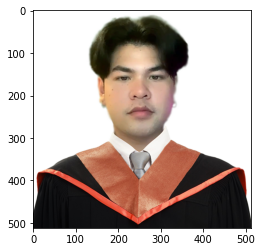

RGB
(512, 512)


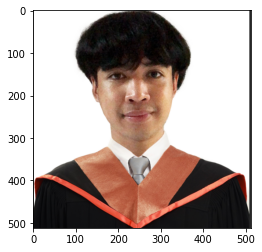

RGB
(512, 512)


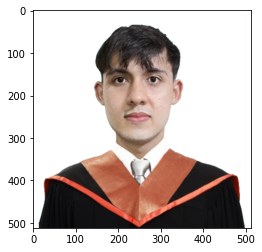

RGB
(512, 512)


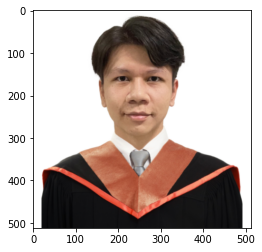

In [3]:
for i in range(4):
    image = Image.open(
        f'Images/{i}.png')
    print(image.mode)
    print(image.size)
    plt.imshow(image)
    plt.show()

### **Dataset Details**
- Dataset consists of images of four individuals.
- Images are in PNG format.
- Image size: 512x512 pixels.
- Color channels: RGB (3 channels).


## **2. Data Transforming**

To prepare the data for training, we will perform the following transformations:

- Resize the images to 128x128 pixels.
- Convert images into numerical format.
- Normalize pixel values to the [0, 1] range.


In [4]:
import numpy as np
from numpy import asarray

In [5]:
images = []

for i in range(0, 4):
    # Load image as pixel array
    image = Image.open(f'Images/{i}.png')
    resized_image = image.resize((128, 128))

    # convert image to numpy array
    data = asarray(resized_image)
    images.append(data)

images_array = np.array(images)
np.save(f'Images/numpy_array.npy', images_array)

### Data

In [6]:
df = np.load(
    r"D:\Repo\DS\Classification\Multi-Classification\face_recognition\Images\numpy_array.npy")

In [7]:
df.shape

(4, 128, 128, 3)

### Target

In [8]:
target = [0,1,2,3]

In [9]:
target_names = ['Dong', 'Aum','TJ','Mark']

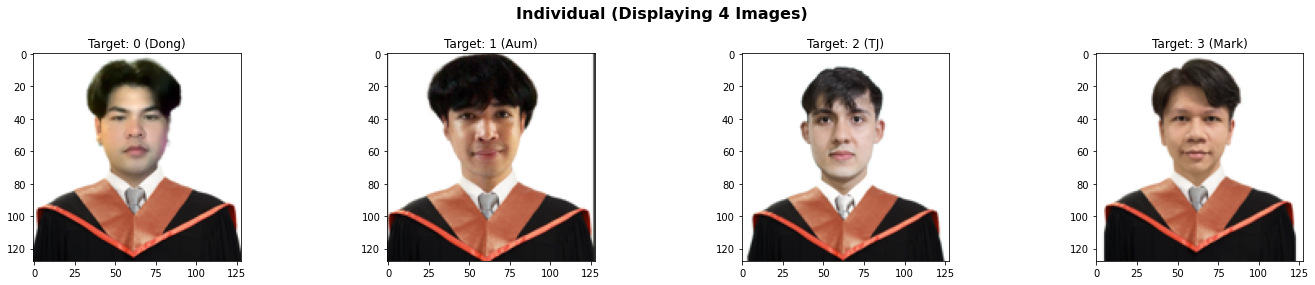

In [11]:
show_image(images=df, target=target, target_names=target_names, title='Individual', num_display=4,
           num_cols=4, cmap=None, random_mode=False)

### 2.1 Normalization
want to rescale pixel values while preserving the original distribution's shape, expect input values in the [0, 1] range.

In [ ]:
plot_channel_distribution(
    df=X, title=f'y.shape={y.shape}')

In [12]:
df = df/255

In [ ]:
plot_channel_distribution(
    df=X, title=f'y.shape={y.shape}')

## **3. Data Augmentation**
Enhance the dataset with data augmentation techniques to increase diversity.

In [13]:
# Random number
import random
# Progess bar
from tqdm import tqdm
# Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
def image_augmentation(images, targets, sample_count):
    '''
    :Parameters
        df (ndarray (n,)): Input data as a numpy array.
        target (ndarray (n,)): Target data as a numpy array.
        sample_count (integer64): Number of data needed.
    '''
    # Adjust the rotation range as needed (-10 to 10 degrees)
    rotation_range = random.randint(-10, 10)
    width_shift_range = random.uniform(0.0, 0.2)
    height_shift_range = random.uniform(0.0, 0.2)
    shear_range = random.uniform(0.0, 0.2)
    zoom_range = random.uniform(0.0, 0.2)
    # Choose fill mode as needed
    fill_mode = random.choice(['nearest', 'constant', 'reflect', 'wrap'])

    # Create the ImageDataGenerator with adjusted parameters
    datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        shear_range=shear_range,
        zoom_range=zoom_range,
        fill_mode=fill_mode
    )
    # Load and augment the data

    augmented_data_generator = datagen.flow(images, targets, batch_size=1)
    batch_images, batch_labels = augmented_data_generator.next()
    for _ in tqdm(range(sample_count), desc='generating...'):
        batch_images, batch_labels = augmented_data_generator.next()
        try:
            combined_images = np.concatenate(
                (combined_images, batch_images), axis=0)
            combined_labels = np.concatenate(
                (combined_labels, batch_labels), axis=0)
        except NameError:
            combined_images = np.concatenate((images, batch_images), axis=0)
            combined_labels = np.concatenate((targets, batch_labels), axis=0)
    '''
    Returns:
        combined_images (ndarray (n,)) : generated images
        combined_labels (ndarray (n,)) : generated labels
    '''
    return combined_images, combined_labels


In [15]:
X, y = image_augmentation(images=df, targets=target,sample_count=296)

generating...: 100%|██████████| 296/296 [00:06<00:00, 45.08it/s]


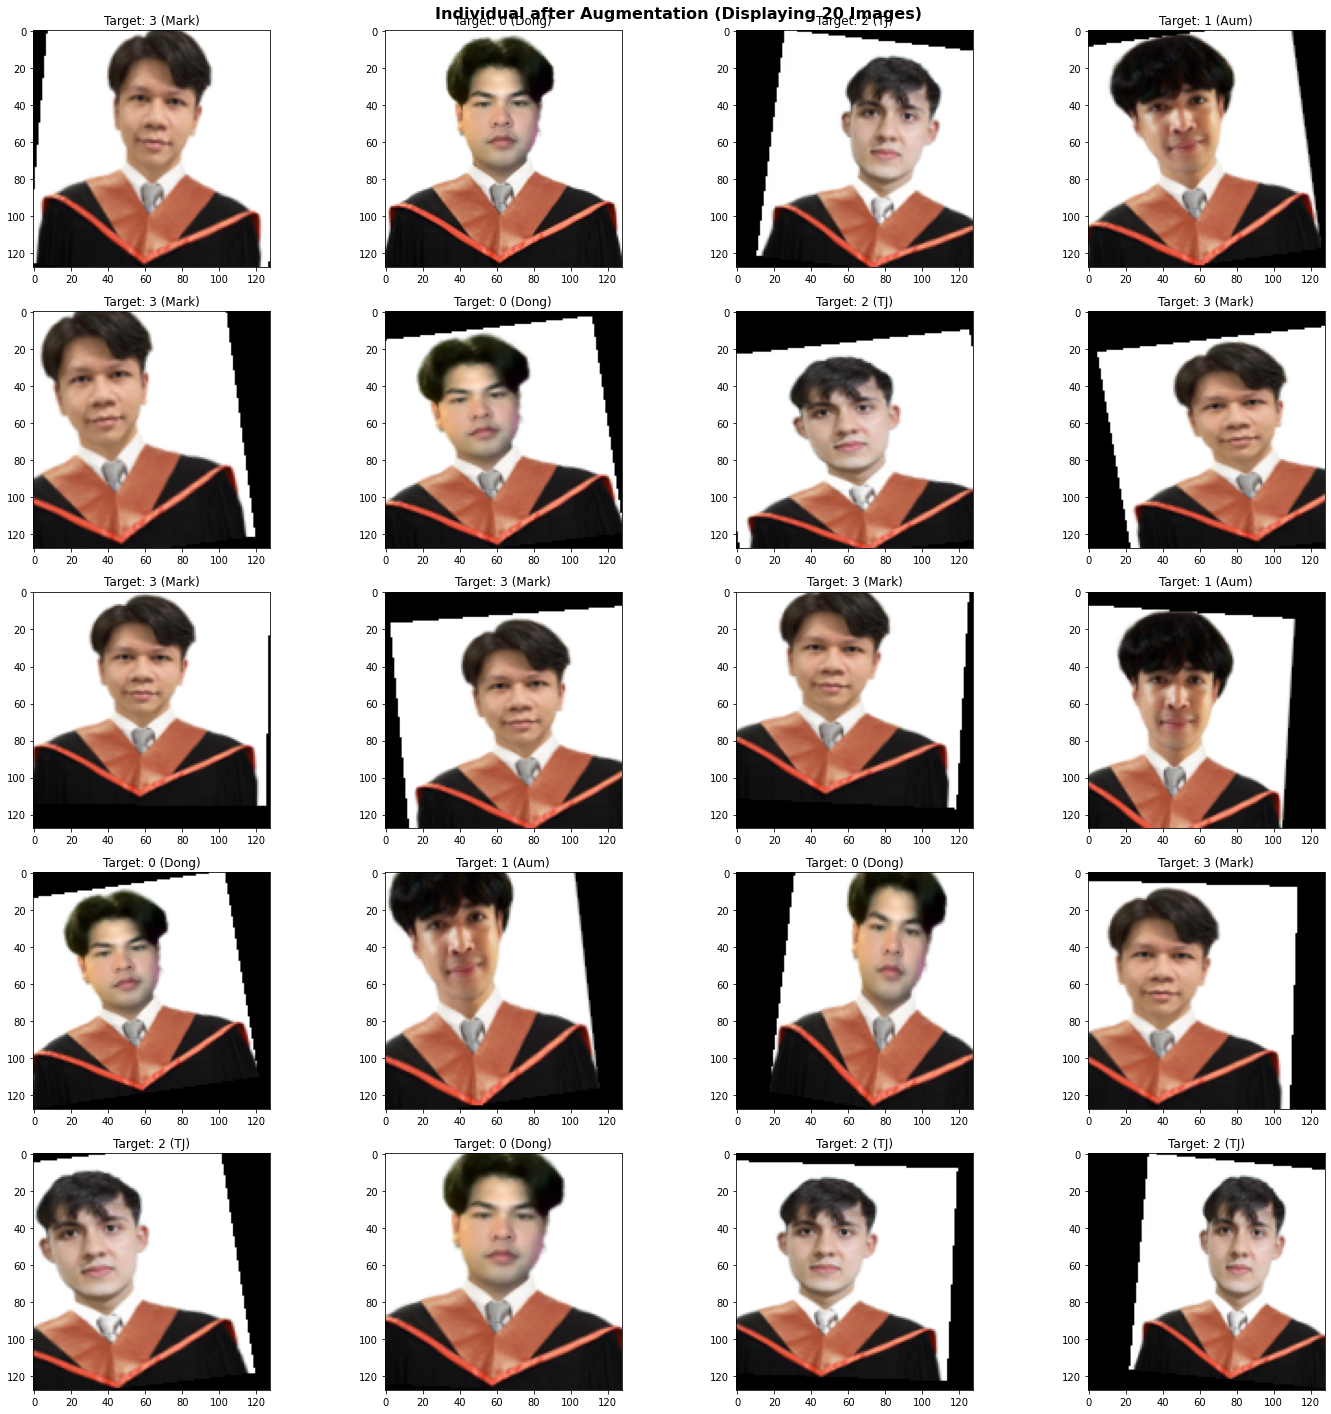

In [16]:
show_image(images=X, 
            target=y,
            target_names=target_names, 
            title='Individual after Augmentation', 
            num_display=20,
            num_cols=4, 
            cmap=None, 
            random_mode=True)

## 4. Data Splitting
- Split the data into training (80%), validation (10%), and testing (10%) sets.
- Ensure that the classes are balanced in each split.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

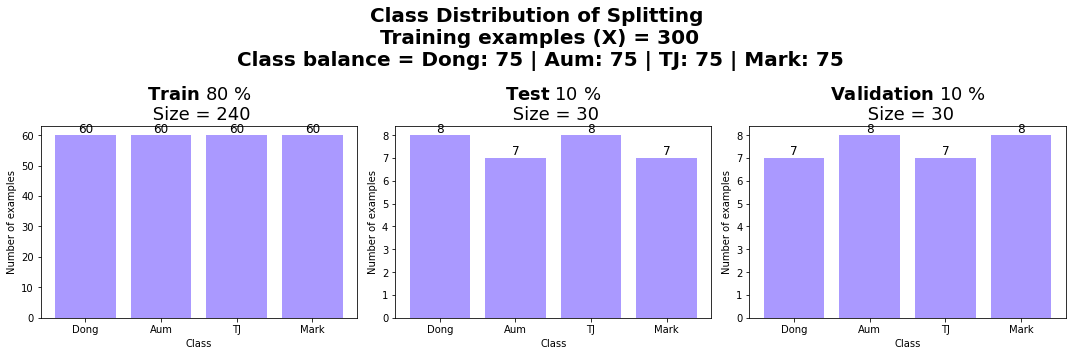

In [21]:
# For visualization
plot_class_distribution(X=X,
                        y=y,
                        title='Class Distribution of Splitting',
                        classes=target_names,
                        train_percent=0.8,
                        val_percent=0.1,
                        test_percent=0.1)


## **4. Modeling**

### **4.1 CNN**
Convolutional Neural Networks (CNNs) are designed to perform tasks on the 2-D image, we can customize the output layer of the CNN to have a single unit, which will classify the input image
### Why CNN?
CNNs are specifically suitable for image data

In [22]:
from cnn import CNN

- input_shape=(Height, Width, Channel)
- input_shape=(128, 128, 3)

In [23]:
model = CNN(input_shape=(128, 128, 3), num_classes=4)

**Input:**

- The input images are RGB Channel and have a shape of **`(height, width, 3)`**.

**Layer Highlights:**

1. **Convolutional Layers:**
    - The model starts with a series of convolutional layers, each capturing different levels of image features.
    - ReLU activation is applied after each convolutional layer.
    - L2 regularization is applied to certain convolutional layers for better generalization.

2. **Pooling Layers:** reducing the input data maybe 25% of input data by a factor determined by the kernel size and stride. This reduction helps to capture and retain important features while reducing computation and memory requirements.

3. **Dropout Regularization:**
    - Dropout with a specified rate helps prevent overfitting by randomly deactivating neurons during training.
4. **Flatten Layer:**
    - After the final convolutional layers, a flatten layer transforms the 3D feature maps into a 1D vector.
5. **Fully Connected Layers:**
    - Two fully connected layers further process the learned features.
    - ReLU activation is applied to the first fully connected layer.
6. **Output Layer:**
    - A multiple-unit output layer uses the **Softmax activation function** for multi-classification.
    - It predicts the probability that an input image belongs to N classes

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [25]:
history = model.train(X_train=X_train, 
            y_train=y_train, 
            X_val=X_val, 
            y_val=y_val, 
            epochs=30, 
            batch_size=64)

Epoch 1/30


c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 4s 887ms/step - loss: 3.6272 - accuracy: 0.2375 - val_loss: 1.3748 - val_accuracy: 0.2667
Epoch 2/30
4/4 [==============================] - 2s 533ms/step - loss: 1.3944 - accuracy: 0.3000 - val_loss: 1.3845 - val_accuracy: 0.2333
Epoch 3/30
4/4 [==============================] - 2s 543ms/step - loss: 1.3746 - accuracy: 0.3167 - val_loss: 1.3821 - val_accuracy: 0.2667
Epoch 4/30
4/4 [==============================] - 2s 506ms/step - loss: 1.3563 - accuracy: 0.3292 - val_loss: 1.3743 - val_accuracy: 0.2333
Epoch 5/30
4/4 [==============================] - 2s 559ms/step - loss: 1.3292 - accuracy: 0.4333 - val_loss: 1.3629 - val_accuracy: 0.3667
Epoch 6/30
4/4 [==============================] - 3s 626ms/step - loss: 1.2786 - accuracy: 0.4333 - val_loss: 1.3409 - val_accuracy: 0.2333
Epoch 7/30
4/4 [==============================] - 2s 522ms/step - loss: 1.2377 - accuracy: 0.4500 - val_loss: 1.2902 - val_accuracy: 0.4333
Epoch 8/30
4/4 [===============

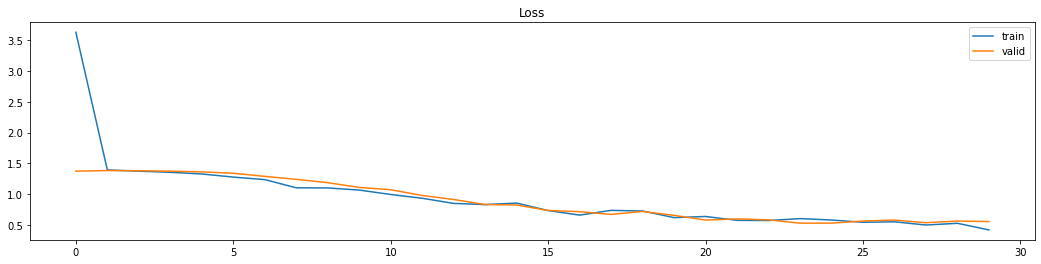

In [26]:
# Plot loss function value through epochs
plt.figure(figsize=(18, 4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.title('Loss')
plt.show()

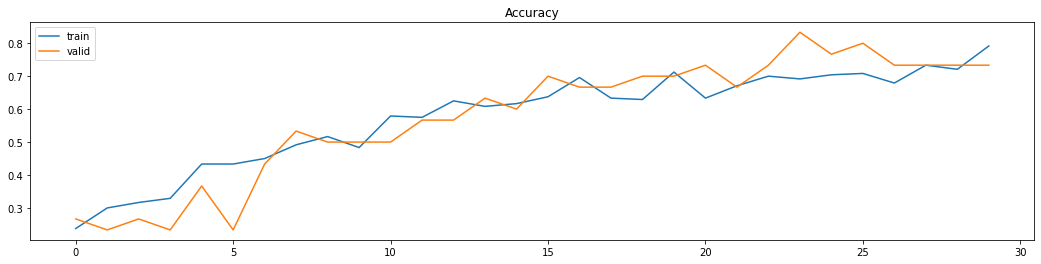

In [27]:
# Plot accuracy through epochs
plt.figure(figsize=(18, 4))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()
plt.title('Accuracy')
plt.show()


## **5. Evaluation**

To evaluate the performance of our face recognition model, we will use the following evaluation metrics:

- Accuracy: The overall accuracy of the model in classifying faces.
- Precision: The ability to correctly classify faces within each class.
- Recall: The proportion of actual faces correctly classified within each class.
- F1-score: The harmonic mean of precision and recall.

We will also visualize these metrics for a detailed analysis.

In [75]:
y_test_pred = model.predict(X_test)

2/2 [==============================] - 0s 46ms/step


In [77]:
y_test_pred =np.argmax(y_test_pred, axis=-1)

In [74]:
from sklearn.metrics import classification_report


In [78]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       1.00      0.87      0.93        15
           2       0.80      0.80      0.80        15
           3       0.75      0.60      0.67        15

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



### **5.1 Cross-validation**

To ensure the reliability of our model, we will perform 5-fold cross-validation. This involves splitting our dataset into five subsets (folds), training the model on four subsets and evaluating on the fifth, and repeating this process five times. This helps us assess the model's generalization performance.

In [28]:
from sklearn.model_selection import StratifiedKFold

In [29]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
num_classes = 4

In [31]:
fold_accuracies = []  

for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = CNN(input_shape=(128, 128, 3), num_classes=num_classes)

    history = model.train(X_train=X_train, y_train=y_train,
                          X_val=X_test, y_val=y_test, epochs=30, batch_size=64)

    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    fold_accuracies.append(test_accuracy)

    print(f"Fold {fold + 1}: Accuracy = {test_accuracy * 100:.2f}%")

mean_accuracy = np.mean(fold_accuracies)
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")

Epoch 1/30


c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 4s 680ms/step - loss: 1.7306 - accuracy: 0.2125 - val_loss: 1.3840 - val_accuracy: 0.2500
Epoch 2/30
4/4 [==============================] - 2s 593ms/step - loss: 1.3751 - accuracy: 0.3250 - val_loss: 1.3739 - val_accuracy: 0.3000
Epoch 3/30
4/4 [==============================] - 2s 611ms/step - loss: 1.3088 - accuracy: 0.4000 - val_loss: 1.3392 - val_accuracy: 0.4333
Epoch 4/30
4/4 [==============================] - 2s 605ms/step - loss: 1.2771 - accuracy: 0.4042 - val_loss: 1.3280 - val_accuracy: 0.4000
Epoch 5/30
4/4 [==============================] - 2s 634ms/step - loss: 1.1525 - accuracy: 0.5458 - val_loss: 1.2438 - val_accuracy: 0.4500
Epoch 6/30
4/4 [==============================] - 2s 571ms/step - loss: 1.0285 - accuracy: 0.5667 - val_loss: 1.1547 - val_accuracy: 0.5333
Epoch 7/30
4/4 [==============================] - 2s 590ms/step - loss: 0.9067 - accuracy: 0.6042 - val_loss: 1.0256 - val_accuracy: 0.6000
Epoch 8/30
4/4 [===============

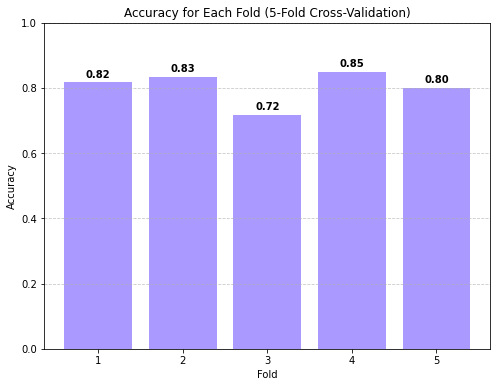

In [32]:

# Plot the fold accuracies
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(fold_accuracies) + 1),
               fold_accuracies,  color='#AA99FF')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Fold (5-Fold Cross-Validation)')
plt.xticks(range(1, len(fold_accuracies) + 1))
plt.ylim(0.0, 1.0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its corresponding accuracy value
for bar, accuracy in zip(bars, fold_accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        accuracy + 0.01,  
        f'{accuracy:.2f}',
        ha='center',  
        va='bottom' if accuracy > 0.5 else 'top',  
        color='black',
        fontsize=10,
        fontweight='bold'
    )

plt.show()


### **5.2 Confusion matrix**
confusion matrix for a multiclass classification problem, 

In [33]:
from sklearn.metrics import confusion_matrix

In [79]:
conf_matrix = confusion_matrix(
    y_test_pred, y_test)


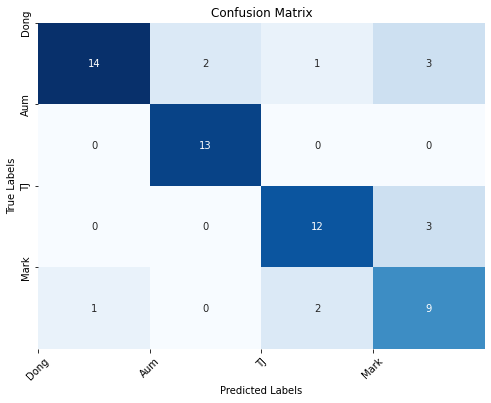

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.xticks(np.arange(len(target_names)), target_names, rotation=45)
plt.yticks(np.arange(len(target_names)), target_names)
plt.show()


## **6. Visualization**
Visualize the results, including comparing actual vs. model predictions, observe the probabilities of model predictions

2/2 [==============================] - 0s 57ms/step


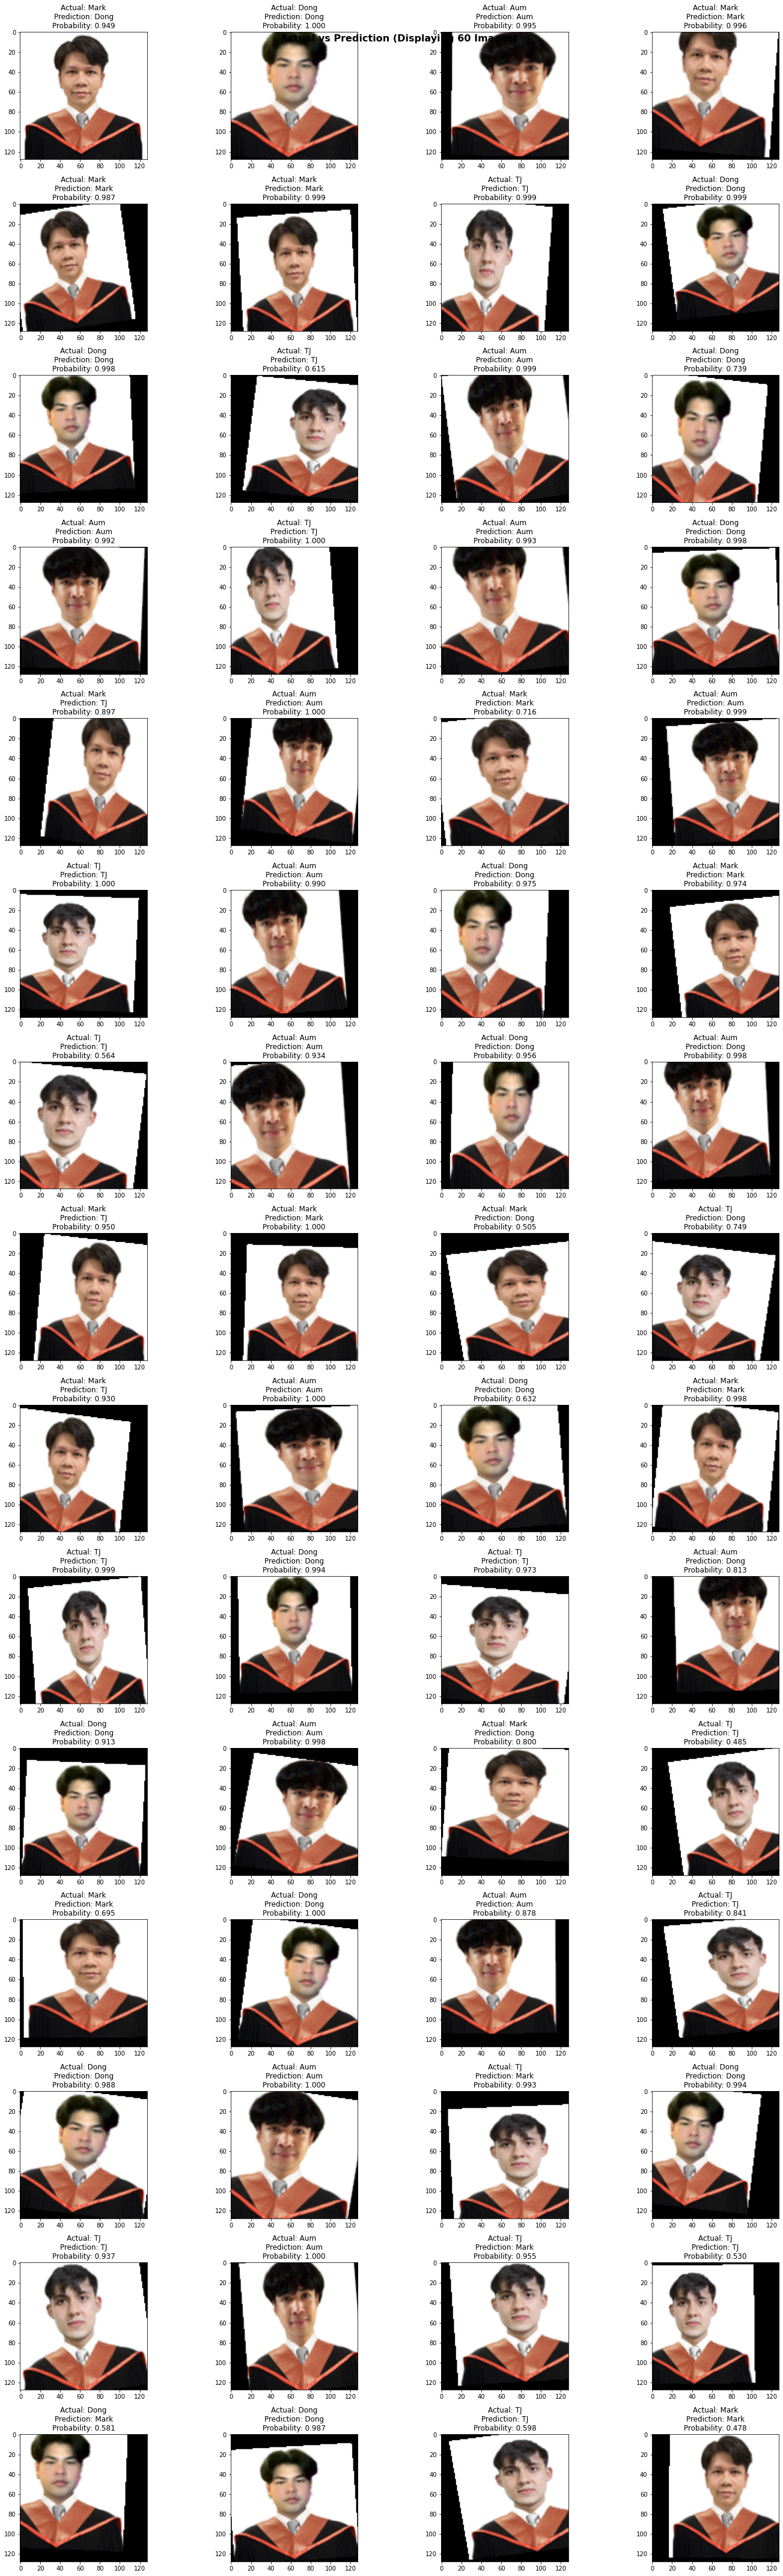

In [38]:
compare_actual_and_predicted(estimator=model, 
                             images=X_test, 
                             target=y_test, 
                             class_labels=target_names,
                             title='Actual vs Prediction', 
                             num_display=X_test.shape[0],
                             num_cols=4, 
                             random_mode=False)


2/2 [==============================] - 0s 65ms/step


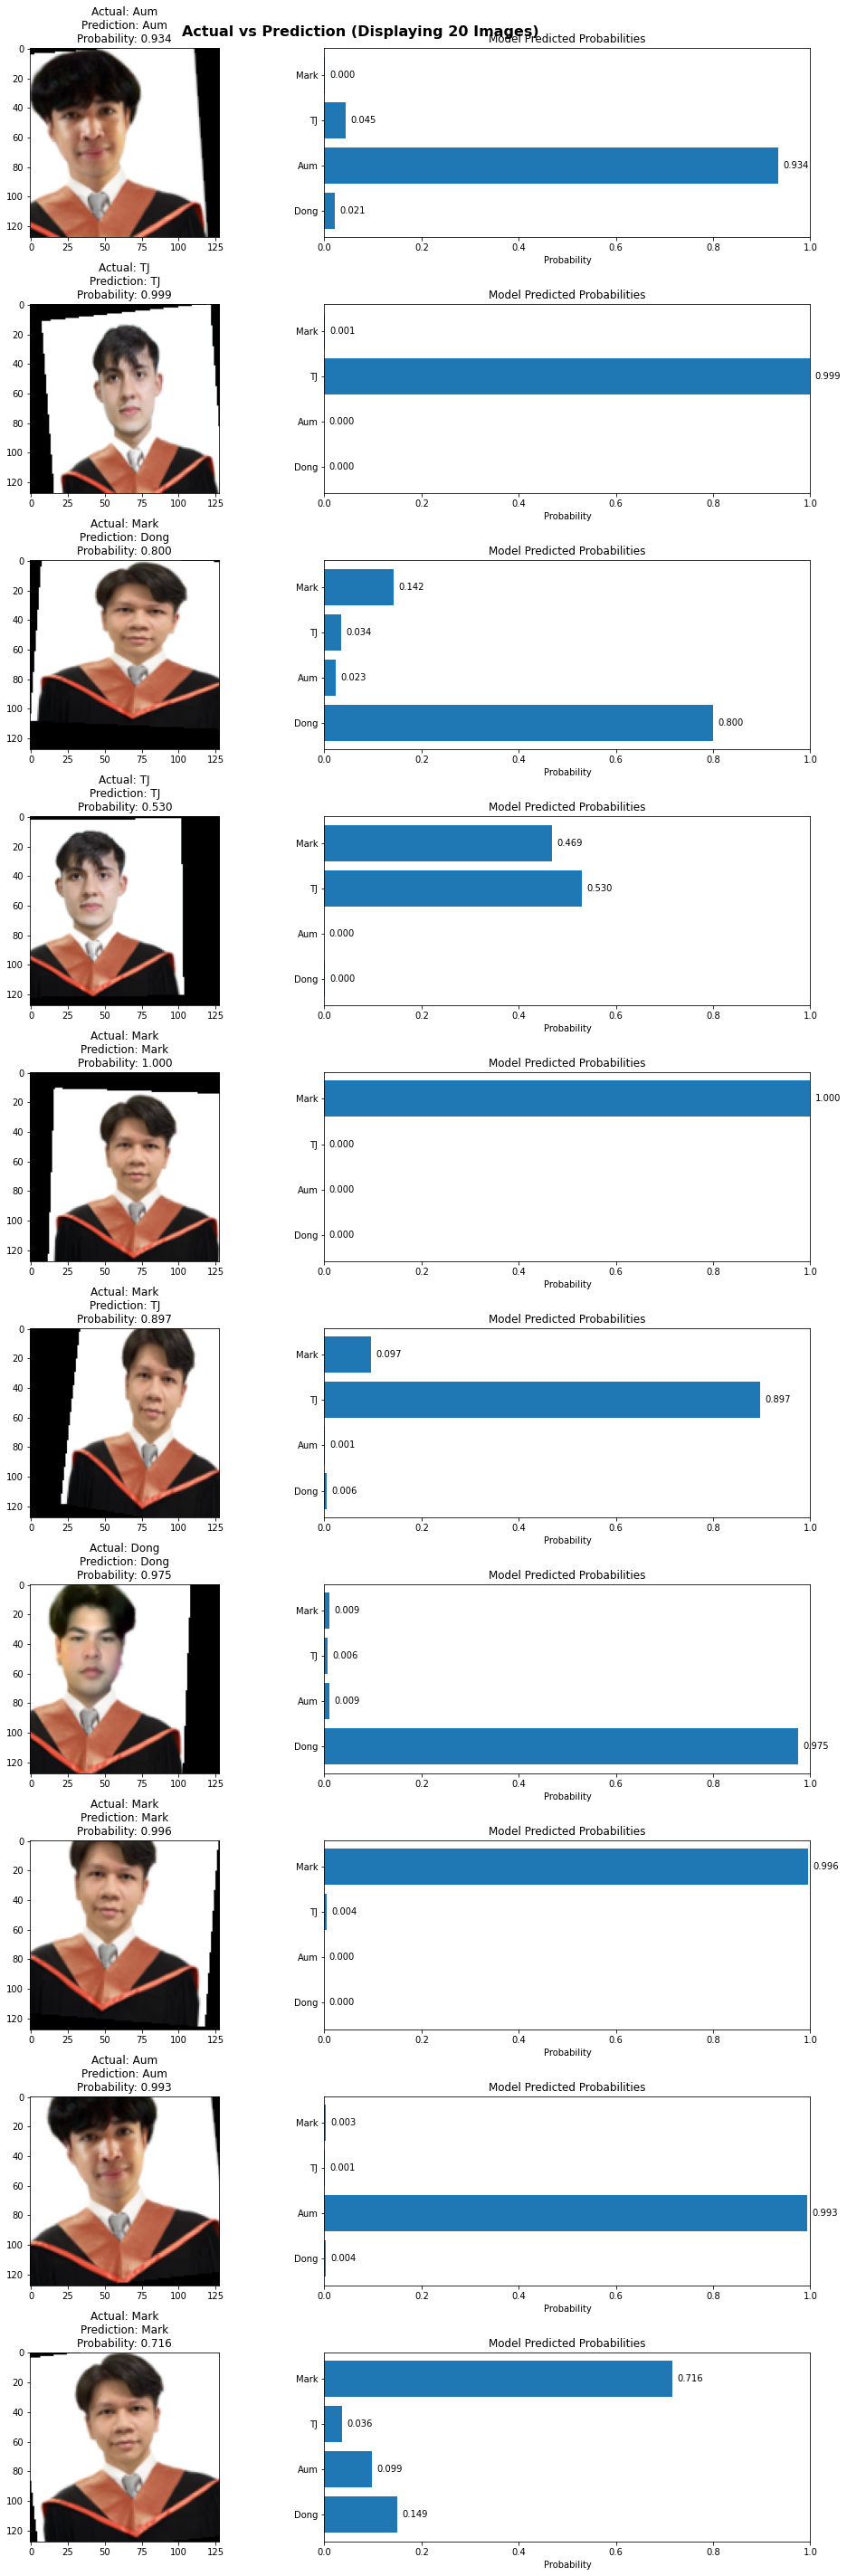

In [39]:
compare_actual_and_predicted_prob(estimator=model,
                             images=X_test,
                             target=y_test,
                             class_labels=target_names,
                             title='Actual vs Prediction',
                             num_display=20,
                             random_mode=True)


In [44]:
model.save_model(name='cnn_model')